# Análise de dados da UBER

## O objetivo dessa análise é responder a 5 perguntas:

1. Qual a porcentagem de corridas canceladas por motoristas, clientes, corridas completas, corridas incompletas e de motoristas não encontrados?
2. Quais os  motivos para motoristas cancelarem a corrida?
3. Quais os  motivos para clientes cancelarem a corrida?
4. Quais são os top 3 locais cujo maior motivo de cancelamento é "passageiros de mais"?
5. Qual o preço médio das tarifas das viagens completas por tipo de veículo?

### Para responder às perguntas, alguns passos serão implemetados:

1. Descrever o dataset
2. Carregar, tratar e limpar o dataset
3. Explorar o dataset(análise gráfica)
4. Preparar a modelagem


### Bibliotecas usadas:
1. pandas
2. matplotlib
3. seaborn


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregar o dataset

In [2]:
df = pd.read_csv("archive/ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


Verifico se existem dados duplicados

In [5]:
df[df.duplicated()]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method


No caso abaixo é verificado quais são os casos em que nenhum valor é estipulado para a viagem.

In [6]:
df2 = df[df["Booking Value"].isna()]
df2["Booking Status"].unique()



array(['No Driver Found', 'Cancelled by Driver', 'Cancelled by Customer'],
      dtype=object)

## Colunas 

In [7]:
for key in df.keys():
    print(key)

Date
Time
Booking ID
Booking Status
Customer ID
Vehicle Type
Pickup Location
Drop Location
Avg VTAT
Avg CTAT
Cancelled Rides by Customer
Reason for cancelling by Customer
Cancelled Rides by Driver
Driver Cancellation Reason
Incomplete Rides
Incomplete Rides Reason
Booking Value
Ride Distance
Driver Ratings
Customer Rating
Payment Method


## Data Transformation
### Para responder às perguntas, são necessárias as seguintes colunas:

1. Booking Status - Status da reserva (Concluída, Cancelada pelo Cliente, Cancelada pelo Motorista etc.)  
2. Reason for cancelling by Customer - Motivo do cancelamento pelo cliente  
3. Driver Cancellation Reason - Motivo do cancelamento pelo motorista  
4. Pickup Location - Local de início da corrida  
5. Booking Value - Valor da tarifa cobrada pela Uber  
6. Vehicle Type - Tipo de veículo (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan)  



#### 1º Passo: Analisar as colunas

Apesar de as colunas *Reason for cancelling by Customer*, *Driver Cancellation Reason* e *Booking Value* terem valores vazios, não é necessário remover essas linhas, pois o fato de estarem vazias indica que as viagens foram completas ou canceladas por algum motivo. Logo, esses valores vazios têm significado.

#### 2º Passo: Plano de ataque para transformar os dados e deixá-los pronto para análise

Tendo em mente a análise das colunas foi definido o seguinte plano:

1. Descartar as colunas que não serão usadas.


### Descatar as colunas que não serão usadas

In [8]:
colunas_usadas = ['Booking Status','Reason for cancelling by Customer',               
                  'Driver Cancellation Reason','Pickup Location',
                  'Booking Value','Vehicle Type']

data = df[colunas_usadas]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Booking Status                     150000 non-null  object 
 1   Reason for cancelling by Customer  10500 non-null   object 
 2   Driver Cancellation Reason         27000 non-null   object 
 3   Pickup Location                    150000 non-null  object 
 4   Booking Value                      102000 non-null  float64
 5   Vehicle Type                       150000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.9+ MB


## Análise Gráfica e Respondendo às perguntas


### Qual a porcentagem de corridas canceladas por motoristas, clientes, corridas completas, corridas incompletas e de motoristas não encontrados?

In [9]:
data["Booking Status"].unique()


array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

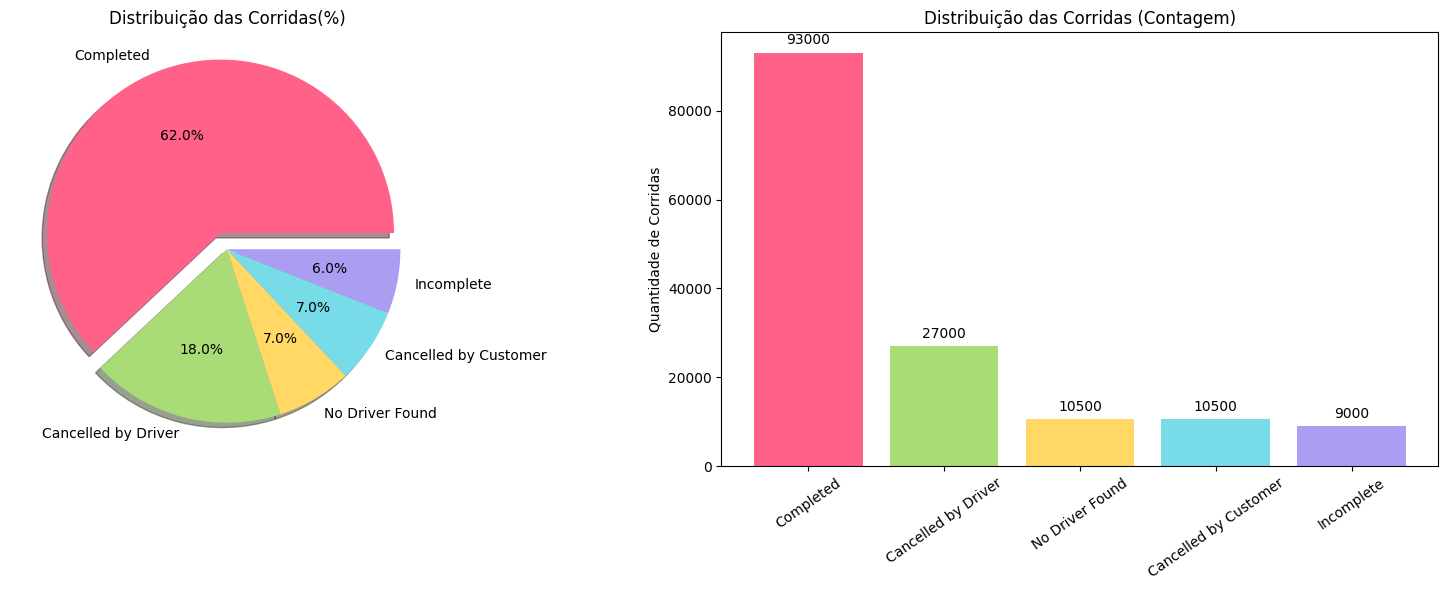

In [10]:
contagem = data["Booking Status"].value_counts()
cores = ['#FF6188',  '#A9DC76',  '#FFD866',  '#78DCE8',  '#AB9DF2',  '#8c564b']
explode = [0.1,0,0,0,0]


# gera uma figura com dois gráficos(uma linha e duas colunas, cada coluna(axes) representa um gráfico)
#o figsize(altura,largura) em polegadas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].pie(
    contagem,                     
    labels=contagem.index,        
    autopct='%1.1f%%',                 
    colors= cores,
    explode= explode,
    shadow= True


    
)

axes[0].set_title("Distribuição das Corridas(%)")

barras = axes[1].bar(
    contagem.index,
    contagem.values,
    color=cores
)

axes[1].set_title("Distribuição das Corridas (Contagem)")
axes[1].set_ylabel("Quantidade de Corridas")
axes[1].tick_params(axis='x', rotation=35)

#Percorre cada Barra e pega a altura e forma esse texto como título da barra(bar.get_height())
axes[1].bar_label(barras, fmt='%d', padding=4)
# ajusta automaticamente o layout da figura
plt.tight_layout()
plt.show()


### Quais os motivos para motoristas cancelarem as viagens?



In [11]:
data["Driver Cancellation Reason"].unique()

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


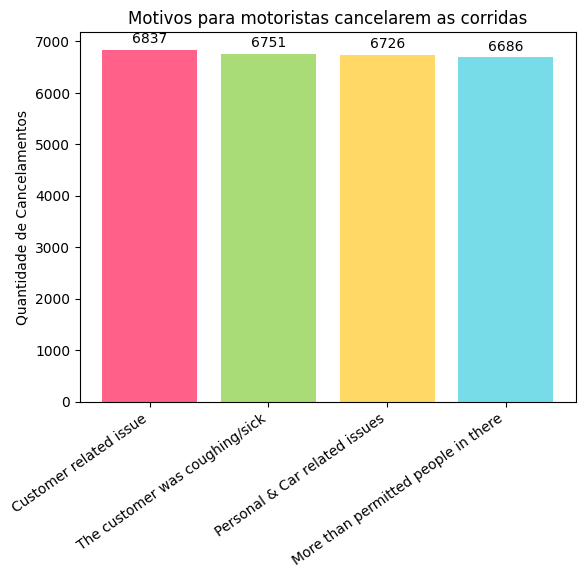

In [12]:
contagem = data["Driver Cancellation Reason"].value_counts()
cores = ['#FF6188',  '#A9DC76',  '#FFD866',  '#78DCE8']
print(contagem)

barras = plt.bar(
    contagem.index,
    contagem.values,
    color= cores
)

plt.title("Motivos para motoristas cancelarem as corridas")
plt.ylabel("Quantidade de Cancelamentos")
plt.xticks(rotation=35, ha='right')


plt.bar_label(barras, fmt='%d', padding=3)

plt.show()

### Quais os  motivos para clientes cancelarem a corrida?

In [13]:
data["Reason for cancelling by Customer"].unique()

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


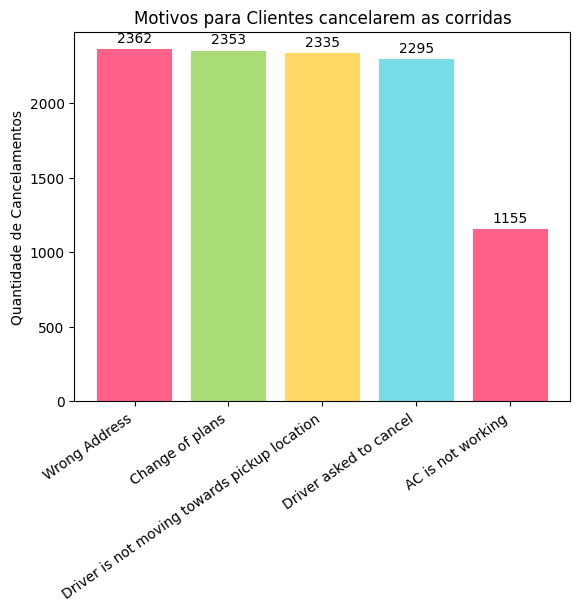

In [14]:
contagem = data["Reason for cancelling by Customer"].value_counts()
cores = ['#FF6188',  '#A9DC76',  '#FFD866',  '#78DCE8']
print(contagem)

barras = plt.bar(
    contagem.index,
    contagem.values,
    color= cores
)

plt.title("Motivos para Clientes cancelarem as corridas")
plt.ylabel("Quantidade de Cancelamentos")
plt.xticks(rotation=35, ha='right')

plt.bar_label(barras, fmt='%d', padding=3)

plt.show()

### Quais são os top 3 locais que tem como o maior motivo de cancelamento terem passageiros de mais?



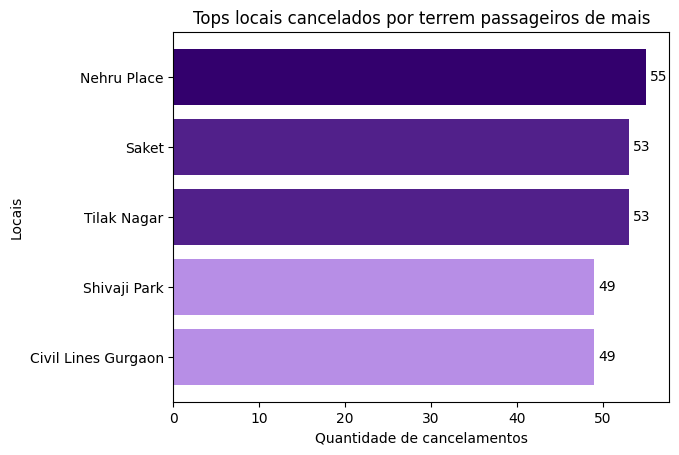

In [15]:
# O loc seleciona linhas com os valores específicos de uma linha e com o nome de uma coluna específica
#data.loc[linha,coluna]
#data["Driver Cancellation Reason"] == "x", me retorna as linhas do data set onde naquela coluna a linha seja igual a x
#A coluna no loc(segundo parametro) vai me retornar os locais onde a linha é igual a x.
contagem = data.loc[data["Driver Cancellation Reason"]== "More than permitted people in there","Pickup Location"].value_counts().head(5)
cores = ["#33006D",  "#51208AFF",  "#51208AFF",  "#B78EE6FF","#B78EE6FF"]

grafico = plt.barh(
    contagem.index,
    contagem.values,
    color = cores
)

plt.title("Tops locais cancelados por terrem passageiros de mais")
plt.xlabel("Quantidade de cancelamentos")
plt.ylabel("Locais")
#Pega o eixo atual do grafico(x e y) e inverto y(maior para o menor)
plt.gca().invert_yaxis()

plt.bar_label(grafico, fmt='%d', padding=3)

plt.show()

### Qual o preço médio das tarifas das viagens completas por tipo de veículo?

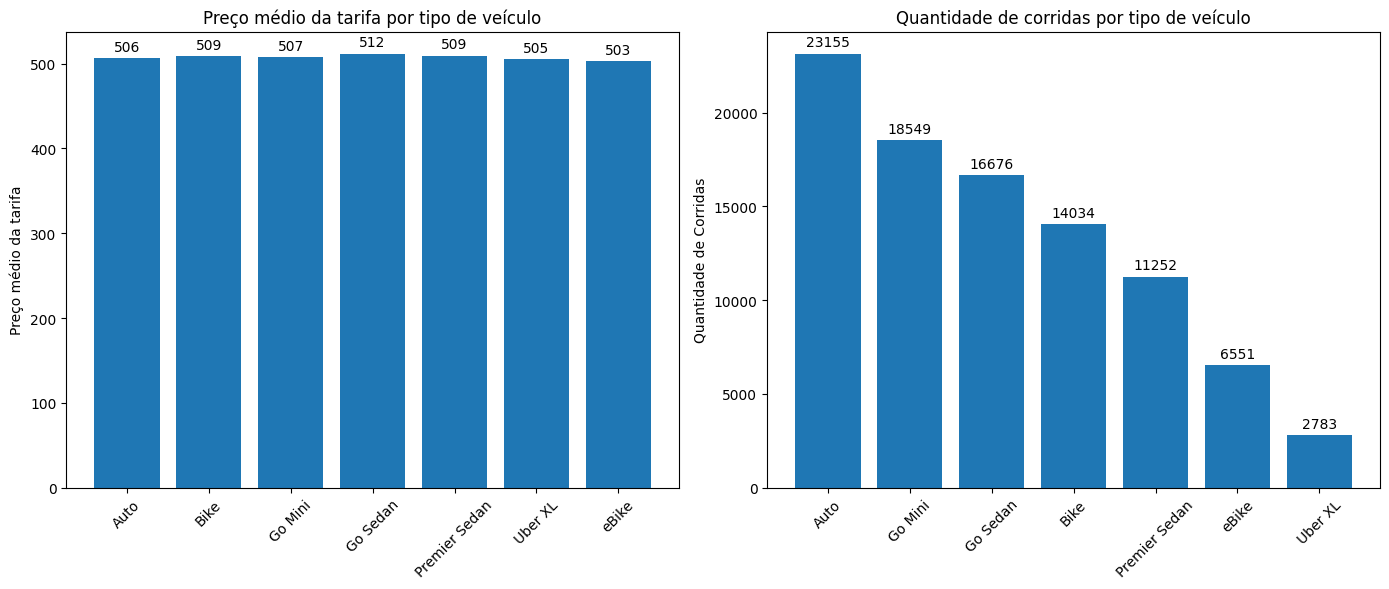

In [16]:
data2 = data[data["Booking Status"] == "Completed"]

contagem = data2["Vehicle Type"].value_counts()

data2 = data2.groupby("Vehicle Type")

media = data2["Booking Value"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


barras0 = axes[0].bar(
    media.index,                     
    media.values        
)

axes[0].set_title("Preço médio da tarifa por tipo de veículo")
axes[0].set_ylabel("Preço médio da tarifa")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(barras0, fmt = "%d", padding = 3)

barras = axes[1].bar(
    contagem.index,
    contagem.values,
)

axes[1].set_title("Quantidade de corridas por tipo de veículo")
axes[1].set_ylabel("Quantidade de Corridas")
axes[1].tick_params(axis='x', rotation=45)

axes[1].bar_label(barras, fmt = "%d", padding = 3)

# ajusta automaticamente o layout da figura
plt.tight_layout()
plt.show()



# Checando por possíveis Outliers nas tarifas

#### Achei estranho o tipo de veículo não alterar tanto o preço da tarifa, decidi testar usando a distância da viagem e retirar os outliers das tarifas.

<Axes: xlabel='Vehicle Type', ylabel='Booking Value'>

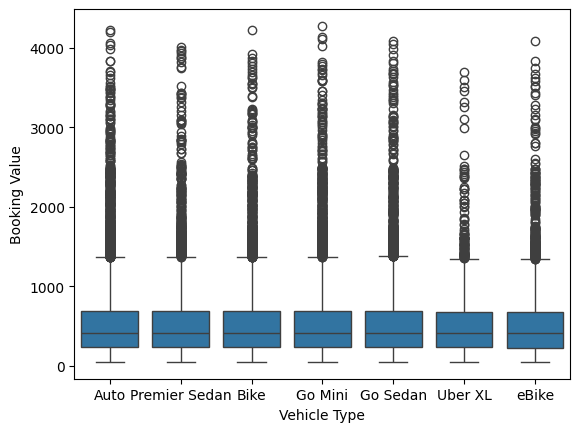

In [17]:
#desagrupo data2 e coloco só corridas completas
data2 = data[data["Booking Status"] == "Completed"]

sns.boxplot(
    x='Vehicle Type',
    y='Booking Value',
    data=data2,
)

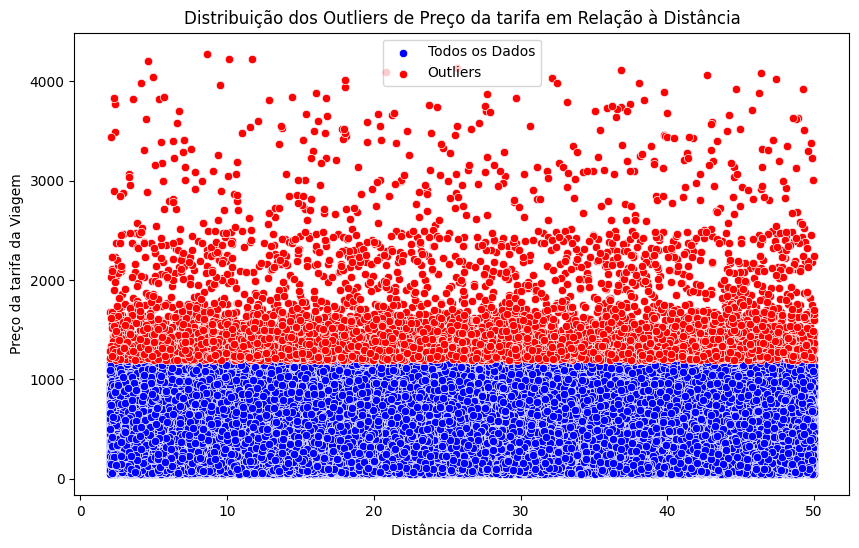

In [18]:
data2 = df[df["Booking Status"] == "Completed"]

# Calcular os quartirs
Q1 = data2['Booking Value'].quantile(0.25)
Q3 = data2['Booking Value'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.1 * IQR

outliers = data2[
    (data2['Booking Value'] < limite_inferior) | 
    (data2['Booking Value'] > limite_superior)
]

plt.figure(figsize=(10, 6))

# Plotar todos os pontos
sns.scatterplot(
    x='Ride Distance', 
    y='Booking Value', 
    data=data2, 
    color='blue',  
    label='Todos os Dados'
)

# Plotar os outliers em uma cor diferente 
sns.scatterplot(
    x='Ride Distance', 
    y='Booking Value', 
    data=outliers, 
    color='red', 
    label='Outliers'
)

plt.title('Distribuição dos Outliers de Preço da tarifa em Relação à Distância')
plt.xlabel('Distância da Corrida')
plt.ylabel('Preço da tarifa da Viagem')
plt.legend()
plt.show()


# Tirando os outliers

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               93000 non-null  object 
 1   Time                               93000 non-null  object 
 2   Booking ID                         93000 non-null  object 
 3   Booking Status                     93000 non-null  object 
 4   Customer ID                        93000 non-null  object 
 5   Vehicle Type                       93000 non-null  object 
 6   Pickup Location                    93000 non-null  object 
 7   Drop Location                      93000 non-null  object 
 8   Avg VTAT                           93000 non-null  float64
 9   Avg CTAT                           93000 non-null  float64
 10  Cancelled Rides by Customer        0 non-null      float64
 11  Reason for cancelling by Customer  0 non-null      object 

In [20]:
#desagrupo data2 e coloco só corridas completas
data2 = df[df["Booking Status"] == "Completed"]
data2 = data2[(data2['Booking Value'] >= limite_inferior) & (data2['Booking Value']<= limite_superior)]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87993 entries, 2 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               87993 non-null  object 
 1   Time                               87993 non-null  object 
 2   Booking ID                         87993 non-null  object 
 3   Booking Status                     87993 non-null  object 
 4   Customer ID                        87993 non-null  object 
 5   Vehicle Type                       87993 non-null  object 
 6   Pickup Location                    87993 non-null  object 
 7   Drop Location                      87993 non-null  object 
 8   Avg VTAT                           87993 non-null  float64
 9   Avg CTAT                           87993 non-null  float64
 10  Cancelled Rides by Customer        0 non-null      float64
 11  Reason for cancelling by Customer  0 non-null      object 

<Axes: xlabel='Vehicle Type', ylabel='Booking Value'>

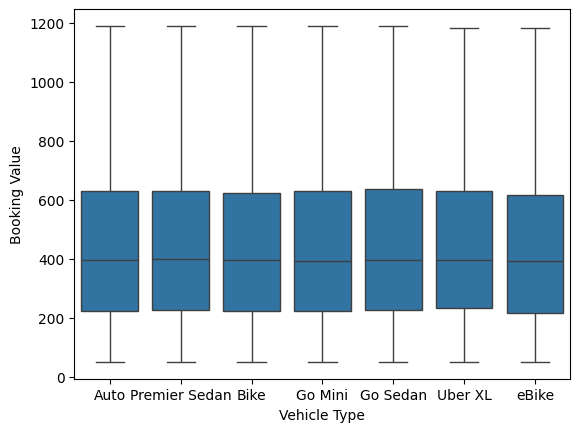

In [21]:
sns.boxplot(
    x='Vehicle Type',
    y='Booking Value',
    data=data2,
)

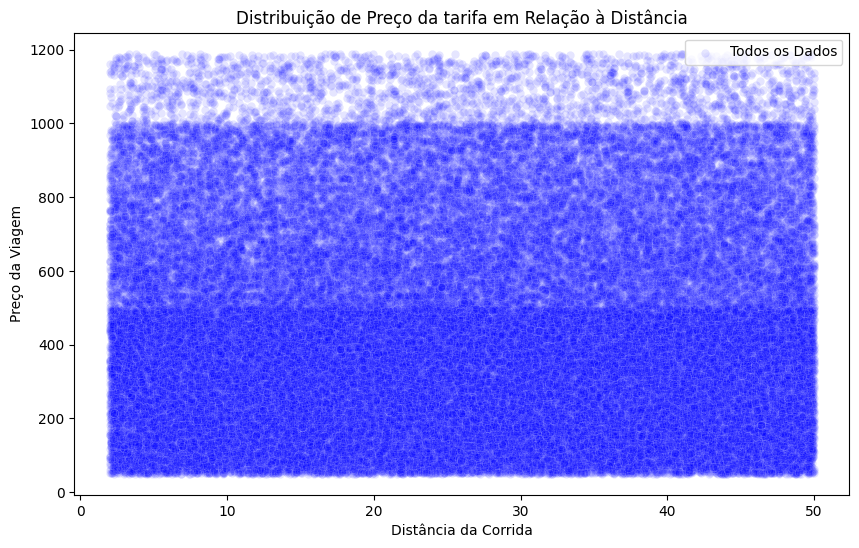

In [22]:


plt.figure(figsize=(10, 6))

# Plotar todos os pontos
sns.scatterplot(
    x='Ride Distance', 
    y='Booking Value', 
    data=data2, 
    color='blue', 
    alpha=0.1, 
    label='Todos os Dados'
)

plt.title('Distribuição de Preço da tarifa em Relação à Distância')
plt.xlabel('Distância da Corrida')
plt.ylabel('Preço da Viagem')
plt.legend()
plt.show()

#### Agora sem outliers nas tarifas, decidi testar se houve diferença da tarifa por tipo de veículo

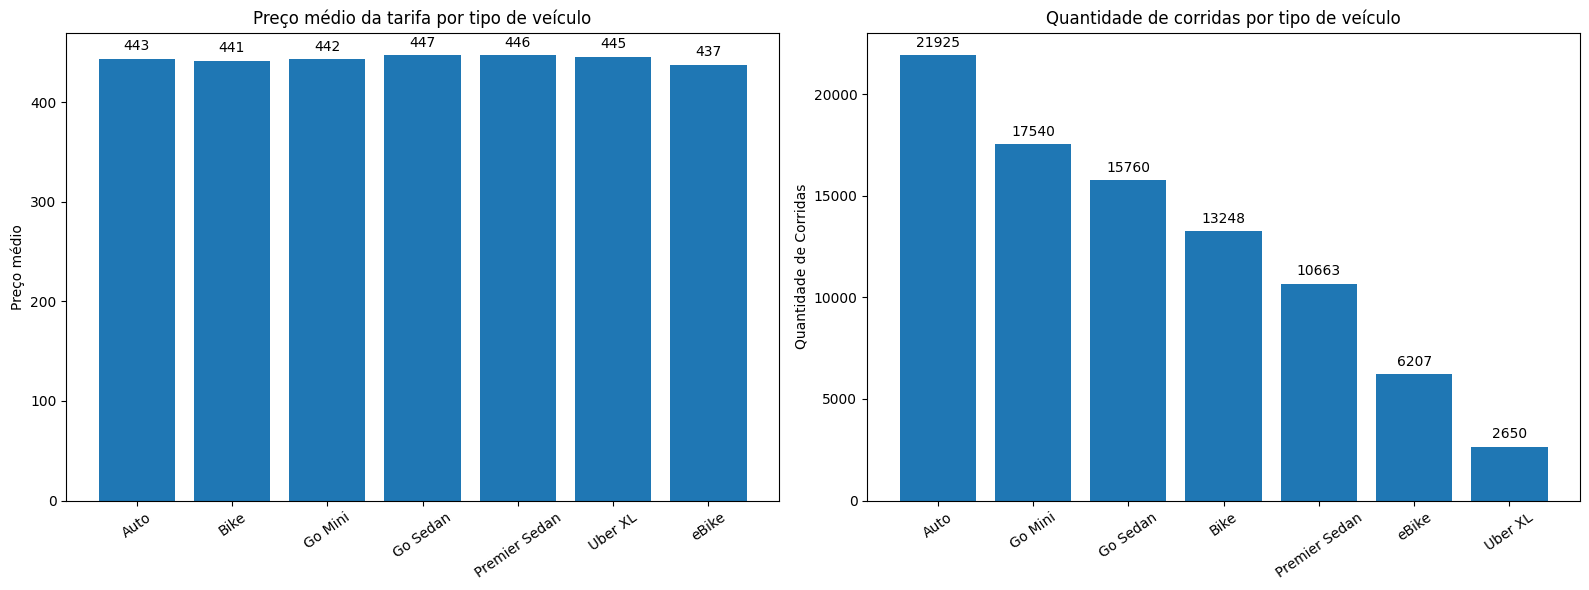

In [23]:
contagem = data2["Vehicle Type"].value_counts()

data2 = data2.groupby("Vehicle Type")

media = data2["Booking Value"].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


barras0 = axes[0].bar(
    media.index,                     
    media.values        
)

axes[0].set_title("Preço médio da tarifa por tipo de veículo")
axes[0].set_ylabel("Preço médio")
axes[0].tick_params(axis='x', rotation=35)
axes[0].bar_label(barras0, fmt = "%d", padding = 4)

barras = axes[1].bar(
    contagem.index,
    contagem.values,
)

axes[1].set_title("Quantidade de corridas por tipo de veículo")
axes[1].set_ylabel("Quantidade de Corridas")
axes[1].tick_params(axis='x', rotation=35)

axes[1].bar_label(barras, fmt = "%d", padding = 4)

# ajusta automaticamente o layout da figura
plt.tight_layout()
plt.show()

## Interpretações Obtida

1. Qual a porcentagem de corridas canceladas por motoristas, clientes, corridas completas, corridas incompletas e de motoristas não encontrados?

    **62% da corridas foram bem sucedidas** e **38% das corridas falharam**.  
    Desses 38%, ** os motoristas foram responsáveis pelo cancelamento em 47% dos casos**.  

2. Quais os  motivos para motoristas cancelarem a corrida?

    O principal motivo está relacionado aos clientes: problemas com o cliente (~25%), cliente doente (~25%) ou transporte que não comportava a quantidade de pessoas (~25%).   
    Os outros 25% se devem a mau funcionamento do carro ou motivos pessoais do motorista.  

3. Quais os  motivos para clientes cancelarem a corrida?  

    Responsáveis por **18% dos cancelamentos**, geralmente devido a problemas com o motorista, local incorreto ou problemas com o carro.  

4. Top 3 locais com cancelamento por excesso de passageiros:    
 
        1. Nehru Place  
        2. Saket  
        3. Tilak Nagar  

    Talvez implantar mais veículos **Uber XL** nesses locais seja interessante para reduzir esse problema.  

5. Qual o preço médio das tarifas das viagens completas por veículo?
    
    O preço da tarifa não varia só pelo tipo de veículo, mas, também, como especificado pela própria UBER, eles aplicam uma "taxa dinâmica" que varia de acordo com a demanda. 

    Quando plotei os gráficos, achei muito estranho as tarifas terem preços médios tão parecidos, então resolvi ver se a tarifa tinha relação com a distância, mas não tinha tanta relação, então decidi procurar e retirar outliers, mas o preço médio continuou parecido. Isso aconteceu porque as taxas são calculadas levando também a demanda por veículos.
      



### Guia

MUKHIYA, Suresh Kumar; AHMED, Usman. Hands-On Exploratory Data Analysis with Python. [S.l.]: Packt, 2020.
Suresh Kumar Mukhiya,Usman Ahmed - 2020 - Hands-On Exploratory Data Analysis with Python  

FACCIANI, Juliano. Entendendo e Interpretando Boxplots com Python. Asimov Academy. [S. l.], [2024]. Disponível em: https://hub.asimov.academy/tutorial/entendendo-e-interpretando-boxplots-com-python/. Acesso em: 15 set. 2025.

### DATASET

https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard